In [ ]:
!git clone https://github.com/layumi/Person_reID_baseline_pytorch

Cloning into 'Person_reID_baseline_pytorch'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 972 (delta 30), reused 1 (delta 0), pack-reused 914
Receiving objects: 100% (972/972), 1.16 MiB | 2.66 MiB/s, done.
Resolving deltas: 100% (567/567), done.


In [ ]:
import gdown
url = 'https://drive.google.com/u/0/uc?export=download&confirm=0xkF&id=0B8-rUzbwVRk0c054eEozWG9COHM'
output = 'Market.zip'
gdown.download(url, output, quiet=False)
# gdown 'https://drive.google.com/u/0/uc?export=download&confirm=0xkF&id=0B8-rUzbwVRk0c054eEozWG9COHM'

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=0xkF&id=0B8-rUzbwVRk0c054eEozWG9COHM
To: /content/Market.zip
153MB [00:00, 305MB/s]


'Market.zip'

In [ ]:
!unzip /content/Market.zip -d /content/Person_reID_baseline_pytorch/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c3s3_006062_00_good.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c3s3_006062_00_junk.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c4s5_038360_00_good.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c4s5_038360_00_junk.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c5s3_006593_00_good.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c5s3_006593_00_junk.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c6s3_029892_00_good.mat  
  inflating: /content/Person_reID_baseline_pytorch/Market-1501-v15.09.15/gt_query/1180_c6s3_029892_00_junk.mat  
  inflating: /content/Person_reID_baseline_py

In [ ]:
%%bash
pip3 install pretrainedmodels

  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=dc43de664854024fc401cdb9e4fcd6f7c752e180e28182111153794b9a5a1317
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [ ]:
%%bash
cd Market
mkdir pytorch

In [ ]:
!python3 /content/Person_reID_baseline_pytorch/prepare.py

In [ ]:
%%bash
cd /content/Person_reID_baseline_pytorch
# python3 train.py --gpu_ids 0 --name ft_ResNet50 --train_all --batchsize 32  --data_dir "./Market/pytorch"
python3 train.py --gpu_ids 0 --name ft_ResNet50 --train_all --batchsize 32  --data_dir "./Market/pytorch" --erasing_p 0.5

This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0
[Resize(size=(256, 128), interpolation=PIL.Image.BICUBIC), Pad(padding=10, fill=0, padding_mode=constant), RandomCrop(size=(256, 128), padding=None), RandomHorizontalFlip(p=0.5), ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), <random_erasing.RandomErasing object at 0x7f9965662400>]
4.862258434295654
ft_net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, 

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


In [ ]:
%%bash
cd /content/Person_reID_baseline_pytorch
python3 test.py --gpu_ids 0 --name ft_ResNet50 --test_dir "./Market/pytorch"  --batchsize 32 --which_epoch 59

This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0
We use the scale: 1
-------test-----------
32
64
96
128
160
192
224
256
288
320
352
384
416
448
480
512
544
576
608
640
672
704
736
768
800
832
864
896
928
960
992
1024
1056
1088
1120
1152
1184
1216
1248
1280
1312
1344
1376
1408
1440
1472
1504
1536
1568
1600
1632
1664
1696
1728
1760
1792
1824
1856
1888
1920
1952
1984
2016
2048
2080
2112
2144
2176
2208
2240
2272
2304
2336
2368
2400
2432
2464
2496
2528
2560
2592
2624
2656
2688
2720
2752
2784
2816
2848
2880
2912
2944
2976
3008
3040
3072
3104
3136
3168
3200
3232
3264
3296
3328
3360
3392
3424
3456
3488
3520
3552
3584
3616
3648
3680
3712
3744
3776
3808
3840
3872
3904
3936
3968
4000
4032
4064
4096
4128
4160
4192
4224
4256
4288
4320
4352
4384
4416
4448
4480
4512
4544
4576
4608
4640
4672
4704
4736
4768
4800
4832
4864
4896
4928
4960
4992
5024
5056
5088
5120
5152
5184
5216
5248
52

In [ ]:
%%bash
cd /content/Person_reID_baseline_pytorch
# python3 test.py --gpu_ids 0 --name ft_ResNet50 --test_dir "./Market/pytorch"  --batchsize 32 --which_epoch 59
python3 /content/Person_reID_baseline_pytorch/demo.py

./Market/pytorch/query/0342/0342_c5s1_079123_00.jpg
Top 10 images are as follow:
./Market/pytorch/gallery/0342/0342_c2s1_078546_01.jpg
./Market/pytorch/gallery/0342/0342_c6s1_079326_08.jpg
./Market/pytorch/gallery/0342/0342_c3s1_078792_03.jpg
./Market/pytorch/gallery/0342/0342_c6s1_079351_05.jpg
./Market/pytorch/gallery/0342/0342_c3s1_078767_01.jpg
./Market/pytorch/gallery/0342/0342_c3s1_094817_02.jpg
./Market/pytorch/gallery/0342/0342_c1s2_022816_02.jpg
./Market/pytorch/gallery/0342/0342_c2s1_078646_01.jpg
./Market/pytorch/gallery/0913/0913_c5s2_113902_04.jpg
./Market/pytorch/gallery/0342/0342_c2s1_095146_01.jpg


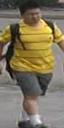

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# /Market/pytorch/gallery/0342/0342_c1s2_006291_02.jpg
img = cv2.imread('/content/Person_reID_baseline_pytorch/Market/pytorch/gallery/0342/0342_c2s1_078546_01.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
# cv2.imshow(cv2.imread('', cv2.IMREAD_UNCHANGED))

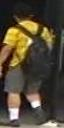

In [ ]:
img = cv2.imread('/content/Person_reID_baseline_pytorch/Market/pytorch/gallery/0342/0342_c6s1_079351_05.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

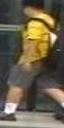

In [ ]:

img = cv2.imread('/content/Person_reID_baseline_pytorch/Market/pytorch/gallery/0342/0342_c6s1_079326_08.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
import torch

torch.save(model, PATH)

In [ ]:
%%bash
cd /content/Person_reID_baseline_pytorch
python3 evaluate.py

0 tensor(1, dtype=torch.int32)
1 tensor(0, dtype=torch.int32)
2 tensor(1, dtype=torch.int32)
3 tensor(1, dtype=torch.int32)
4 tensor(1, dtype=torch.int32)
5 tensor(1, dtype=torch.int32)
6 tensor(1, dtype=torch.int32)
7 tensor(1, dtype=torch.int32)
8 tensor(1, dtype=torch.int32)
9 tensor(1, dtype=torch.int32)
10 tensor(1, dtype=torch.int32)
11 tensor(1, dtype=torch.int32)
12 tensor(1, dtype=torch.int32)
13 tensor(1, dtype=torch.int32)
14 tensor(1, dtype=torch.int32)
15 tensor(1, dtype=torch.int32)
16 tensor(1, dtype=torch.int32)
17 tensor(0, dtype=torch.int32)
18 tensor(1, dtype=torch.int32)
19 tensor(1, dtype=torch.int32)
20 tensor(1, dtype=torch.int32)
21 tensor(1, dtype=torch.int32)
22 tensor(1, dtype=torch.int32)
23 tensor(1, dtype=torch.int32)
24 tensor(1, dtype=torch.int32)
25 tensor(1, dtype=torch.int32)
26 tensor(1, dtype=torch.int32)
27 tensor(0, dtype=torch.int32)
28 tensor(0, dtype=torch.int32)
29 tensor(0, dtype=torch.int32)
30 tensor(1, dtype=torch.int32)
31 tensor(0, dtype